In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler


In [36]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [37]:
# Rename the column '#Passengers' to 'passengers' in the DataFrame
data.rename(columns={'#Passengers': 'passengers'}, inplace=True)

# Access the 'passengers' column and assign it to a new variable or use it directly
data = data['passengers']

# Now you can continue working with the 'passengers' column or the DataFrame 'data' as needed


In [38]:
type(data)

pandas.core.series.Series

In [39]:
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [40]:
data = np.array(data).reshape(-1,1)


In [41]:
type(data)

numpy.ndarray

In [42]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)



In [43]:
train = data[0:100,:]
test = data[100:,:]


In [44]:
def get_data(data , steps):
    dataX = []
    dataY = []
    for i in range (len(data)-steps-1):
        a = data[i+steps,0]
        dataX.append(a)
        dataY.append(data[i+steps,0])
    return np.array(dataX),np.array(dataY)
# yani üçer üçer sınıflandırıp tahmin etmek olarak anlaşılabilir

In [45]:
steps =2

In [46]:
# #### Now I'm making my datasets for both training and testing..

# Important: You must have numpy version 1.19 in your Anaconda environment for LSTM work. If you have a error like "NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array." you must change your numpy version to 1.19 using this commnad:



X_train, y_train = get_data(train, steps)
X_test, y_test = get_data(test, steps)


In [50]:
# Im reshaping my sets for using in LSTM model..
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

IndexError: tuple index out of range

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape = (1, steps)))  # This is my first hidden layer with 128 memory blocks
model.add(Dense(64))                                  # This is my second hidden layer with 64 memory blocks
model.add(Dense(1))   # This is my output layer
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


c:\Users\cengh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        67,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,393 (294.50 KB)

 Trainable params: 75,393 (294.50 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.fit(X_train, y_train, epochs=25, batch_size=1)


Epoch 1/25


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1,), dtype=float32). Expected shape (None, 1, 2), but input has incompatible shape (1,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1,), dtype=float32)
  • training=True
  • mask=None

In [53]:
y_pred = model.predict(X_test)


# We should rescale the prediction results, because our model gives us scaled predictions..
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32,), dtype=float32). Expected shape (None, 1, 2), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=False
  • mask=None

NameError: name 'y_pred' is not defined

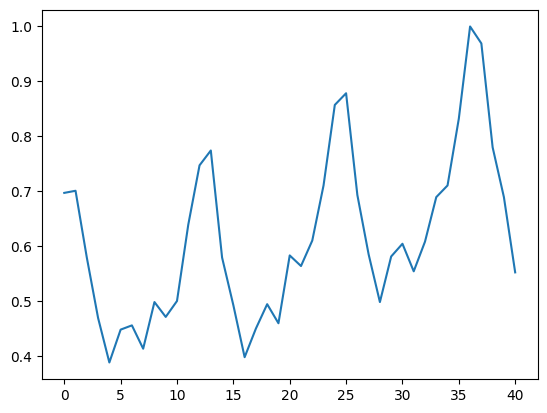

In [54]:
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('Months')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()
